In [1]:
#Dependencies
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Delta

In [3]:
#Read in csv
csv_path= "Delta-LGA.csv"

delta_lga_df=pd.read_csv(csv_path, header=7)

delta_lga_df.head(200)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,DL,1/1/17,121.0,N922DL,MSP,6:00,5:51,181.0,181.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DL,1/1/17,192.0,N325US,DTW,9:00,9:04,125.0,107.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DL,1/1/17,307.0,N914DL,TPA,7:00,6:57,185.0,177.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DL,1/1/17,346.0,N926AT,FLL,20:25,20:19,184.0,172.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DL,1/1/17,352.0,N991AT,TPA,20:30,20:22,187.0,161.0,-8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,DL,1/2/17,606.0,N934DN,MSY,19:40,19:42,225.0,198.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,DL,1/2/17,623.0,N914DL,MCO,8:00,7:59,182.0,211.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,DL,1/2/17,632.0,N315US,DEN,18:00,17:53,281.0,290.0,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,DL,1/2/17,773.0,N999DN,MSP,18:55,18:51,200.0,198.0,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Remove unnecessary columns
clean_delta_lga_df=delta_lga_df.drop(['Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28', 'Unnamed: 29'], axis=1)
clean_delta_lga_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/17,121.0,N922DL,MSP,6:00,5:51,181.0,181.0,-9.0,6:01,10.0,0.0,0.0,0.0,0.0,0.0
1,DL,1/1/17,192.0,N325US,DTW,9:00,9:04,125.0,107.0,4.0,9:16,12.0,0.0,0.0,0.0,0.0,0.0
2,DL,1/1/17,307.0,N914DL,TPA,7:00,6:57,185.0,177.0,-3.0,7:14,17.0,0.0,0.0,0.0,0.0,0.0
3,DL,1/1/17,346.0,N926AT,FLL,20:25,20:19,184.0,172.0,-6.0,20:37,18.0,0.0,0.0,0.0,0.0,0.0
4,DL,1/1/17,352.0,N991AT,TPA,20:30,20:22,187.0,161.0,-8.0,20:35,13.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68517,DL,12/31/18,2713.0,N377NW,TPA,14:05,14:03,188.0,163.0,-2.0,14:19,16.0,0.0,0.0,0.0,0.0,0.0
68518,DL,12/31/18,2835.0,N971AT,DTW,14:55,14:48,129.0,117.0,-7.0,15:01,13.0,0.0,0.0,0.0,0.0,0.0
68519,DL,12/31/18,2852.0,N319US,PBI,15:31,15:27,181.0,158.0,-4.0,15:41,14.0,0.0,0.0,0.0,0.0,0.0
68520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create new Dataframe 
summary_delta=clean_delta_lga_df[["Carrier Code", "Date (MM/DD/YYYY)", "Destination Airport", 
                                   "Scheduled departure time", "Actual departure time", "Scheduled elapsed time (Minutes)", 
                                   "Actual elapsed time (Minutes)", "Departure delay (Minutes)", "Delay Carrier (Minutes)", 
                                   "Delay Weather (Minutes)", "Delay National Aviation System (Minutes)", 
                                   "Delay Security (Minutes)", "Delay Late Aircraft Arrival (Minutes)"]] 
summary_delta

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/17,MSP,6:00,5:51,181.0,181.0,-9.0,0.0,0.0,0.0,0.0,0.0
1,DL,1/1/17,DTW,9:00,9:04,125.0,107.0,4.0,0.0,0.0,0.0,0.0,0.0
2,DL,1/1/17,TPA,7:00,6:57,185.0,177.0,-3.0,0.0,0.0,0.0,0.0,0.0
3,DL,1/1/17,FLL,20:25,20:19,184.0,172.0,-6.0,0.0,0.0,0.0,0.0,0.0
4,DL,1/1/17,TPA,20:30,20:22,187.0,161.0,-8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68517,DL,12/31/18,TPA,14:05,14:03,188.0,163.0,-2.0,0.0,0.0,0.0,0.0,0.0
68518,DL,12/31/18,DTW,14:55,14:48,129.0,117.0,-7.0,0.0,0.0,0.0,0.0,0.0
68519,DL,12/31/18,PBI,15:31,15:27,181.0,158.0,-4.0,0.0,0.0,0.0,0.0,0.0
68520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Remove repeated row and drop NaN values 
lga_summary_delta=summary_delta.dropna()
lga_summary_delta.head()

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/17,MSP,6:00,5:51,181.0,181.0,-9.0,0.0,0.0,0.0,0.0,0.0
1,DL,1/1/17,DTW,9:00,9:04,125.0,107.0,4.0,0.0,0.0,0.0,0.0,0.0
2,DL,1/1/17,TPA,7:00,6:57,185.0,177.0,-3.0,0.0,0.0,0.0,0.0,0.0
3,DL,1/1/17,FLL,20:25,20:19,184.0,172.0,-6.0,0.0,0.0,0.0,0.0,0.0
4,DL,1/1/17,TPA,20:30,20:22,187.0,161.0,-8.0,0.0,0.0,0.0,0.0,0.0


In [7]:
lga_summary_delta.count()

Carrier Code                                68520
Date (MM/DD/YYYY)                           68520
Destination Airport                         68520
Scheduled departure time                    68520
Actual departure time                       68520
Scheduled elapsed time (Minutes)            68520
Actual elapsed time (Minutes)               68520
Departure delay (Minutes)                   68520
Delay Carrier (Minutes)                     68520
Delay Weather (Minutes)                     68520
Delay National Aviation System (Minutes)    68520
Delay Security (Minutes)                    68520
Delay Late Aircraft Arrival (Minutes)       68520
dtype: int64

In [8]:
lga_summary_delta_date=lga_summary_delta.groupby(['Date (MM/DD/YYYY)'], as_index=False).agg({'Departure delay (Minutes)':'sum'})
lga_summary_delta_date

,Date (MM/DD/YYYY),Departure delay (Minutes)
0,1/1/17,214.0
1,1/1/18,594.0
2,1/1/19,-228.0
3,1/10/17,353.0
4,1/10/18,163.0
...,...,...
998,9/8/18,-84.0
999,9/8/19,91.0
1000,9/9/17,-88.0
1001,9/9/18,396.0


In [9]:
delta_date_delay_df=pd.DataFrame(lga_summary_delta_date)

In [10]:
delta_date_delay_df['Date']=pd.to_datetime(delta_date_delay_df['Date (MM/DD/YYYY)'])

In [11]:
delta_date_delay_unsort=delta_date_delay_df.drop(['Date (MM/DD/YYYY)'], axis=1)

In [12]:
delta_date_delay_sort=delta_date_delay_unsort.sort_values(by=['Departure delay (Minutes)'], ascending=False)
delta_date_delay_sort

,Departure delay (Minutes),Date
675,13637.0,2019-06-20
622,12947.0,2017-05-05
735,12610.0,2019-07-11
488,9984.0,2018-04-02
836,9782.0,2018-08-14
...,...,...
545,-251.0,2018-05-01
920,-254.0,2018-09-11
915,-259.0,2019-09-01
481,-265.0,2017-04-18


In [13]:
final_delta_date=delta_date_delay_sort.head(20)

In [14]:
date=delta_date_delay_sort.head(1)

In [15]:
date.iloc[0]['Date']

Timestamp('2019-06-20 00:00:00')

In [16]:
x_axis=np.arange(len(final_delta_date))
tick_location=[value for value in x_axis]
y_axis=final_delta_date['Departure delay (Minutes)']

([<matplotlib.axis.XTick at 0x1125b0f10>,
 <a list of 20 Text xticklabel objects>)

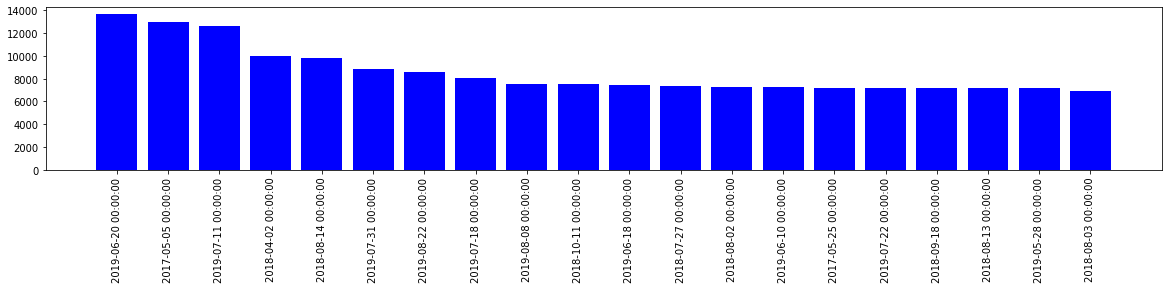

In [17]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align='center')
plt.xticks(tick_location, final_delta_date['Date'], rotation='vertical')

In [18]:
lga_delta_check_reason=lga_summary_delta.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [19]:
lga_delta_check_reason['Date']=pd.to_datetime(lga_delta_check_reason['Date (MM/DD/YYYY)'])
lga_delta_check_reason 

,Date (MM/DD/YYYY),Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/17,12258.0,11273.0,214.0,138.0,0.0,16.0,0.0,92.0,2017-01-01
1,1/1/18,12424.0,11680.0,594.0,278.0,0.0,82.0,0.0,184.0,2018-01-01
2,1/1/19,10954.0,10084.0,-228.0,0.0,22.0,29.0,0.0,0.0,2019-01-01
3,1/10/17,11735.0,10123.0,353.0,22.0,0.0,73.0,0.0,260.0,2017-01-10
4,1/10/18,11725.0,10608.0,163.0,0.0,0.0,233.0,0.0,0.0,2018-01-10
...,...,...,...,...,...,...,...,...,...,...
998,9/8/18,5883.0,5280.0,-84.0,0.0,0.0,0.0,0.0,0.0,2018-09-08
999,9/8/19,12671.0,11153.0,91.0,191.0,0.0,20.0,0.0,28.0,2019-09-08
1000,9/9/17,5692.0,3481.0,-88.0,0.0,0.0,0.0,0.0,0.0,2017-09-09
1001,9/9/18,10388.0,9467.0,396.0,307.0,0.0,108.0,0.0,178.0,2018-09-09


In [20]:
LGA_delta_check_date=lga_delta_check_reason.drop([])

In [21]:
lga_delta_check_reason_1=lga_delta_check_reason.loc[lga_delta_check_reason["Date"]==date.iloc[0]['Date']]
lga_delta_check_reason_1

,Date (MM/DD/YYYY),Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
675,6/20/19,16267.0,15968.0,13637.0,3839.0,963.0,1116.0,0.0,7494.0,2019-06-20


In [22]:
 lga_delta_check_reason_1.iloc[0][0]

'6/20/19'

In [23]:
d=lga_delta_check_reason_1.iloc[0].count()

In [24]:
lga_delta_check_reason_1.columns[5].split(" ")[0]

'Delay'

In [25]:
value=[]
heading=[]

In [26]:
for i in range(d-1):
    if lga_delta_check_reason_1.columns[i].split(" ")[0]== "Delay":
        print(lga_delta_check_reason_1.columns[i])
        value.append(lga_delta_check_reason_1.iloc[0][i])
        heading.append(lga_delta_check_reason_1.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [27]:
max(value)

7494.0

In [28]:
value.index(max(value))

4

In [29]:
reason=heading[value.index(max(value))]

In [30]:
print("Reason for delay is {}".format(reason))

Reason for delay is Delay Late Aircraft Arrival (Minutes)


Text(0.5, 1.0, 'Date 2019-06-20, main reason for delay is Late')

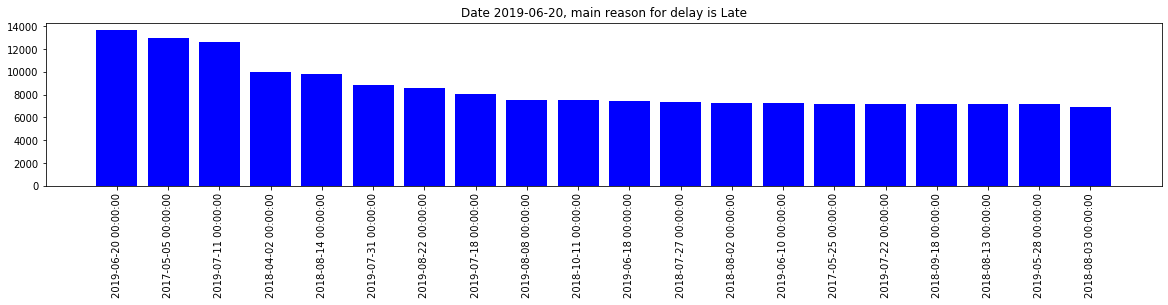

In [31]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_location, final_delta_date['Date'], rotation="vertical")
plt.title("Date {}, main reason for delay is {}".format(str(date.iloc[0]['Date']).split(" ")[0], reason.split(" ")[1]))

In [32]:
date1=delta_date_delay_sort.head(3)
date1

,Departure delay (Minutes),Date
675,13637.0,2019-06-20
622,12947.0,2017-05-05
735,12610.0,2019-07-11


In [33]:
lga_delta_check_reason_1=lga_delta_check_reason.loc[lga_delta_check_reason["Date"]==date1.iloc[2]['Date']]
lga_delta_check_reason_1

,Date (MM/DD/YYYY),Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
735,7/11/19,16526.0,15857.0,12610.0,5914.0,0.0,2661.0,0.0,4357.0,2019-07-11


In [34]:
#Group by Date & Destination Airport 

In [35]:
lga_delta_dest=lga_summary_delta.groupby(['Date (MM/DD/YYYY)', 'Destination Airport'], as_index=False).agg({'Departure delay (Minutes)': 'sum'})

In [36]:
date_destination_delay=pd.DataFrame(lga_delta_dest)
date_destination_delay

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes)
0,1/1/17,ATL,88.0
1,1/1/17,BUF,-3.0
2,1/1/17,DEN,16.0
3,1/1/17,DTW,-13.0
4,1/1/17,FLL,4.0
...,...,...,...
13686,9/9/19,MSP,-26.0
13687,9/9/19,MSY,-7.0
13688,9/9/19,ORD,91.0
13689,9/9/19,PBI,-2.0


In [37]:
date_destination_delay['Date']=pd.to_datetime(date_destination_delay['Date (MM/DD/YYYY)'])
date_destination_delay

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Date
0,1/1/17,ATL,88.0,2017-01-01
1,1/1/17,BUF,-3.0,2017-01-01
2,1/1/17,DEN,16.0,2017-01-01
3,1/1/17,DTW,-13.0,2017-01-01
4,1/1/17,FLL,4.0,2017-01-01
...,...,...,...,...
13686,9/9/19,MSP,-26.0,2019-09-09
13687,9/9/19,MSY,-7.0,2019-09-09
13688,9/9/19,ORD,91.0,2019-09-09
13689,9/9/19,PBI,-2.0,2019-09-09


In [38]:
date_destination_delay_unsort=date_destination_delay.drop(['Date (MM/DD/YYYY)'], axis=1)
date_destination_delay_unsort

,Destination Airport,Departure delay (Minutes),Date
0,ATL,88.0,2017-01-01
1,BUF,-3.0,2017-01-01
2,DEN,16.0,2017-01-01
3,DTW,-13.0,2017-01-01
4,FLL,4.0,2017-01-01
...,...,...,...
13686,MSP,-26.0,2019-09-09
13687,MSY,-7.0,2019-09-09
13688,ORD,91.0,2019-09-09
13689,PBI,-2.0,2019-09-09


In [39]:
date_destination_delay_sort=date_destination_delay_unsort.sort_values(by=['Departure delay (Minutes)'], ascending=False)

In [40]:
date_destination_delay_sort_plot=date_destination_delay_sort.head(10)

In [41]:
lga_check_dest_reason=lga_summary_delta.groupby(['Date (MM/DD/YYYY)', 'Destination Airport'], as_index=False).sum()

In [42]:
lga_check_dest_reason['Date']=pd.to_datetime(lga_check_dest_reason['Date (MM/DD/YYYY)'])
lga_check_dest_reason

,Date (MM/DD/YYYY),Destination Airport,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/17,ATL,1605.0,1557.0,88.0,21.0,0.0,16.0,0.0,92.0,2017-01-01
1,1/1/17,BUF,87.0,75.0,-3.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
2,1/1/17,DEN,551.0,526.0,16.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
3,1/1/17,DTW,480.0,426.0,-13.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
4,1/1/17,FLL,1549.0,1387.0,4.0,16.0,0.0,0.0,0.0,0.0,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...
13686,9/9/19,MSP,1275.0,1288.0,-26.0,0.0,0.0,0.0,0.0,0.0,2019-09-09
13687,9/9/19,MSY,190.0,199.0,-7.0,0.0,0.0,0.0,0.0,0.0,2019-09-09
13688,9/9/19,ORD,2093.0,2147.0,91.0,93.0,0.0,92.0,0.0,21.0,2019-09-09
13689,9/9/19,PBI,730.0,738.0,-2.0,0.0,0.0,0.0,0.0,0.0,2019-09-09


In [43]:
date1=date_destination_delay_sort.head(3)

In [44]:
date1.iloc[0]['Destination Airport']

'ORD'

In [45]:
lga_check_dest_reason_1=lga_check_dest_reason.loc[(lga_check_dest_reason['Destination Airport']==date1.iloc[0]['Destination Airport'])]                               


In [46]:
lga_check_dest_reason_1=lga_check_dest_reason_1[lga_check_dest_reason['Date']==date1.iloc[0]['Date']]
lga_check_dest_reason_1

,Date (MM/DD/YYYY),Destination Airport,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
10801,7/29/19,ORD,2394.0,2588.0,3378.0,703.0,0.0,2833.0,0.0,69.0,2019-07-29


In [47]:
d=lga_check_dest_reason_1.iloc[0].count()
d

11

In [48]:
value_dest=[]
heading_dest=[]

for i in range(d-1):
    if lga_check_dest_reason_1.columns[i].split(" ")[0]== "Delay":
        print(lga_check_dest_reason_1.columns[i])
        value_dest.append(lga_check_dest_reason_1.iloc[0][i])
        heading_dest.append(lga_check_dest_reason_1.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [49]:
value_dest

[703.0, 0.0, 2833.0, 0.0, 69.0]

In [50]:
heading_dest

['Delay Carrier (Minutes)',
 'Delay Weather (Minutes)',
 'Delay National Aviation System (Minutes)',
 'Delay Security (Minutes)',
 'Delay Late Aircraft Arrival (Minutes)']

In [51]:
max(value_dest)

2833.0

In [52]:
reason_dest=heading_dest[value_dest.index(max(value_dest))]

In [53]:
reason_dest

'Delay National Aviation System (Minutes)'

In [54]:
x_axis=np.arange(len(date_destination_delay_sort_plot))
tick_location=[value for value in x_axis]
y_axis=date_destination_delay_sort_plot['Departure delay (Minutes)']

Text(0.5, 1.0, 'Date 2019-07-29, main reason for delay is National')

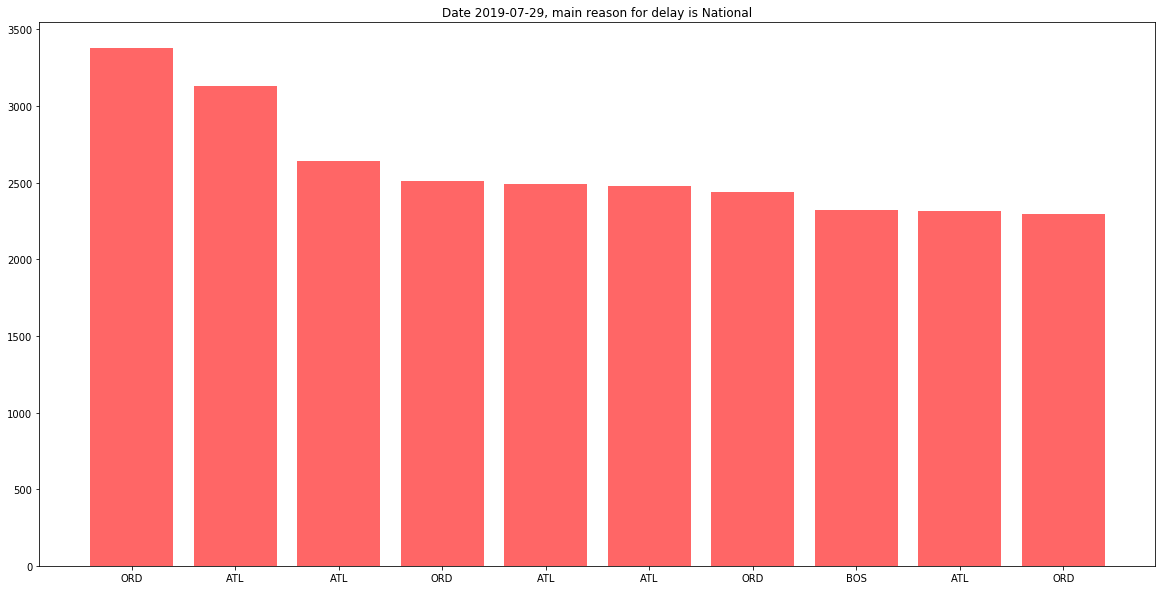

In [55]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_location, date_destination_delay_sort_plot['Destination Airport'])
plt.title("Date {}, main reason for delay is {}".format(str(date1.iloc[0]['Date']).split(" ")[0], reason_dest.split(" ")[1]))

In [56]:
# Set data
x_axis = lga_summary_delta['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_delta['Delay Weather (Minutes)']

0         -9.0
1          4.0
2         -3.0
3         -6.0
4         -8.0
         ...  
68515    177.0
68516     -3.0
68517     -2.0
68518     -7.0
68519     -4.0
Name: Departure delay (Minutes), Length: 68520, dtype: float64


In [57]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

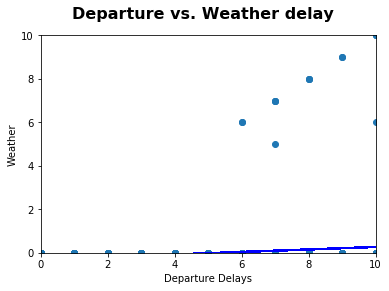

In [58]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs. Weather delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Weather")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [59]:
# Set data
x_axis = lga_summary_delta['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_delta['Delay Carrier (Minutes)']

0         -9.0
1          4.0
2         -3.0
3         -6.0
4         -8.0
         ...  
68515    177.0
68516     -3.0
68517     -2.0
68518     -7.0
68519     -4.0
Name: Departure delay (Minutes), Length: 68520, dtype: float64


In [60]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

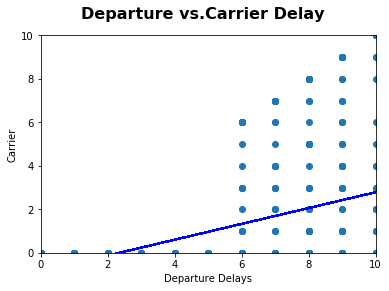

In [61]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Carrier Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Carrier")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [62]:
# Set data
x_axis = lga_summary_delta['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_delta['Delay National Aviation System (Minutes)']

0         -9.0
1          4.0
2         -3.0
3         -6.0
4         -8.0
         ...  
68515    177.0
68516     -3.0
68517     -2.0
68518     -7.0
68519     -4.0
Name: Departure delay (Minutes), Length: 68520, dtype: float64


In [63]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

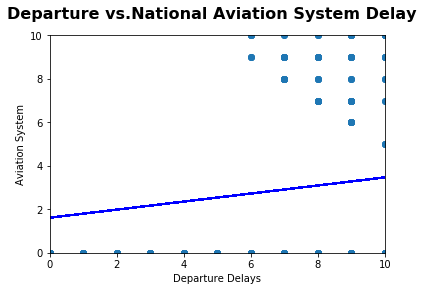

In [64]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.National Aviation System Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Aviation System")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [65]:
# Set data
x_axis = lga_summary_delta['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_delta['Delay Security (Minutes)']

0         -9.0
1          4.0
2         -3.0
3         -6.0
4         -8.0
         ...  
68515    177.0
68516     -3.0
68517     -2.0
68518     -7.0
68519     -4.0
Name: Departure delay (Minutes), Length: 68520, dtype: float64


In [66]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

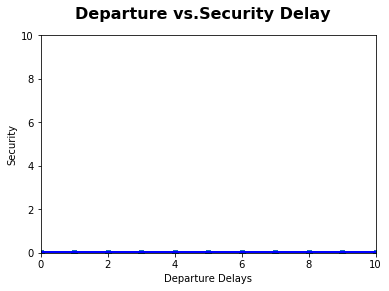

In [67]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Security Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Security")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [68]:
# Set data
x_axis = lga_summary_delta['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_delta['Delay Late Aircraft Arrival (Minutes)']

0         -9.0
1          4.0
2         -3.0
3         -6.0
4         -8.0
         ...  
68515    177.0
68516     -3.0
68517     -2.0
68518     -7.0
68519     -4.0
Name: Departure delay (Minutes), Length: 68520, dtype: float64


In [69]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

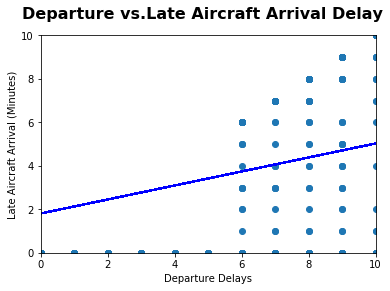

In [70]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Late Aircraft Arrival Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Late Aircraft Arrival (Minutes)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [71]:
date_destination_delay.to_csv("LGA_delta_date",index=False)

In [72]:
lga_check_dest_reason.to_csv("LGA_delta_dest", index=False)